Plot prediction accuracy for new MLPR architecture with hidden_layer_sizes = (25,25,25,25)
Also plot bootstrap results to see if there is improvement for this new model

In [1]:
import matplotlib.pyplot as plt
import pickle
import os, sys
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import plotting
from plotting import plot_accuracy_multi
import ml_models
from ml_models import model_bootstrap

In [2]:
# Load test datasets
list_test_dict = pickle.load(open(f'data/test_data_exclude_log', 'rb'))
# Load trained ML model
model = pickle.load(open(f'data/mlpr_lbfgs_exclude_log_new', 'rb'))


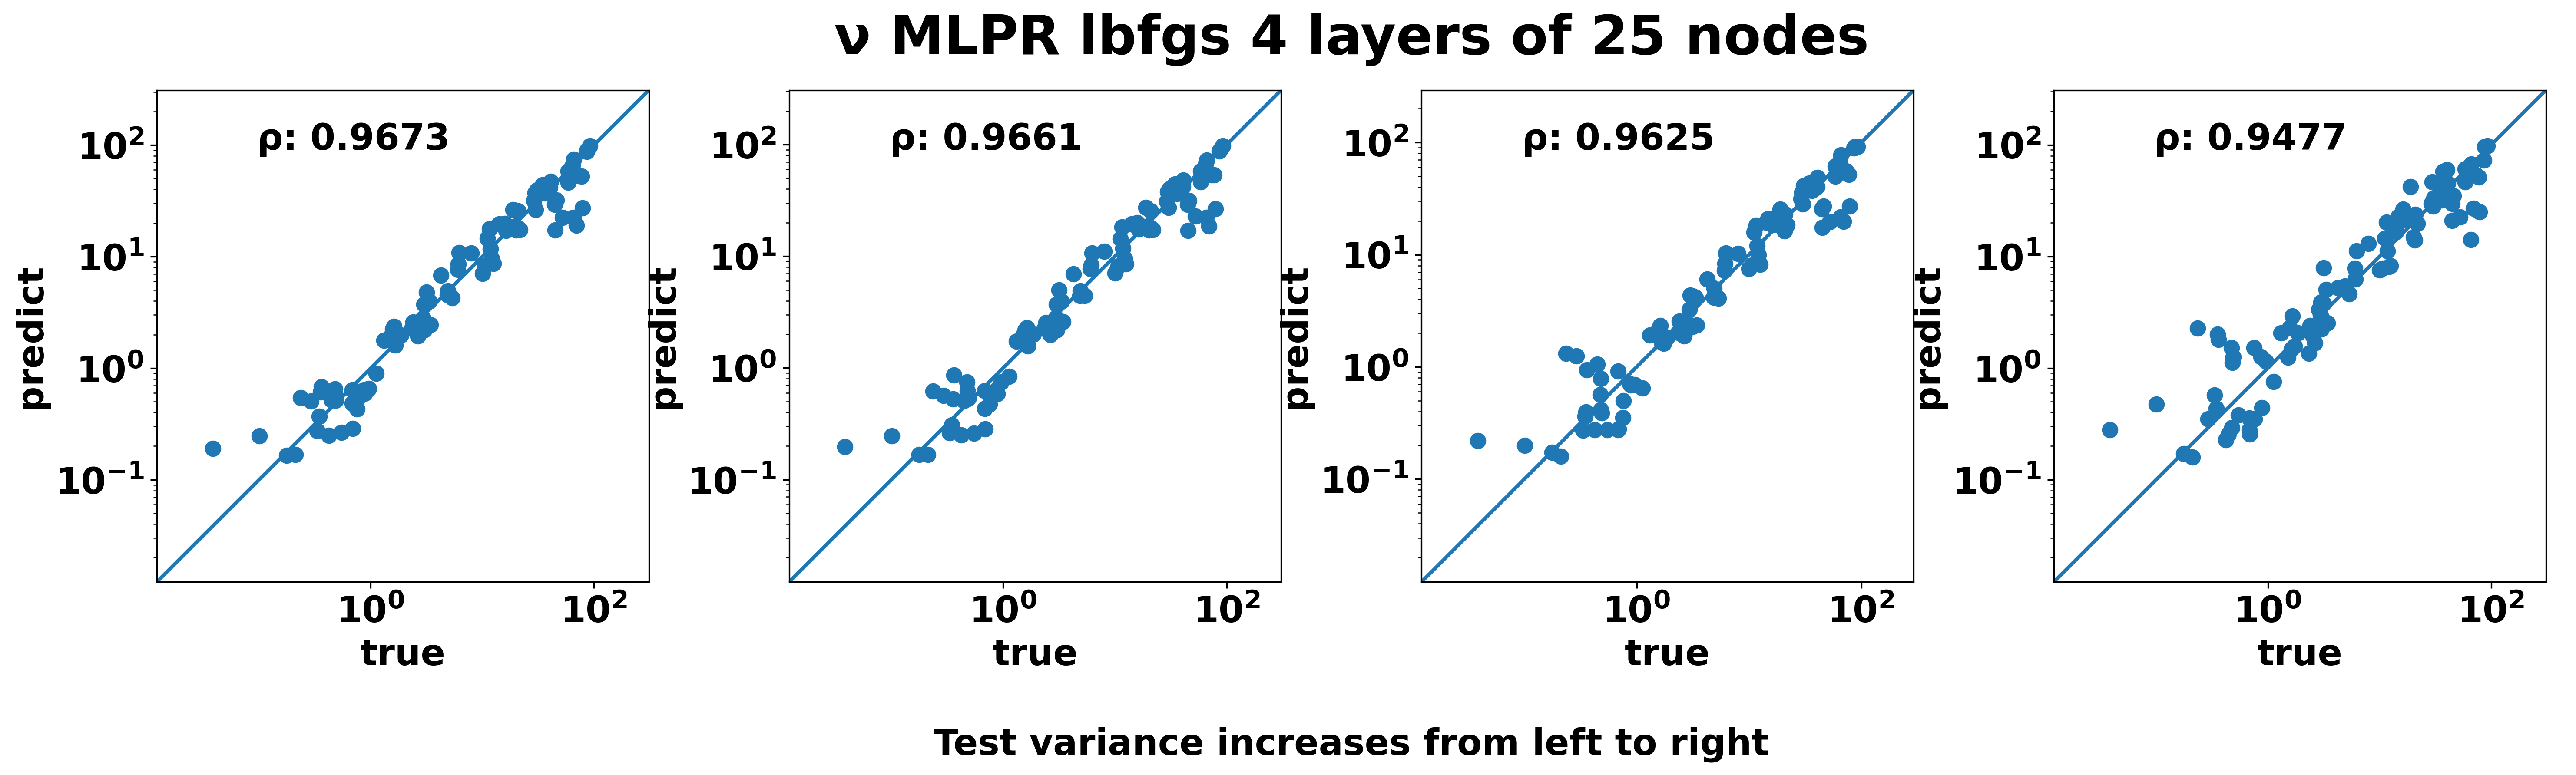

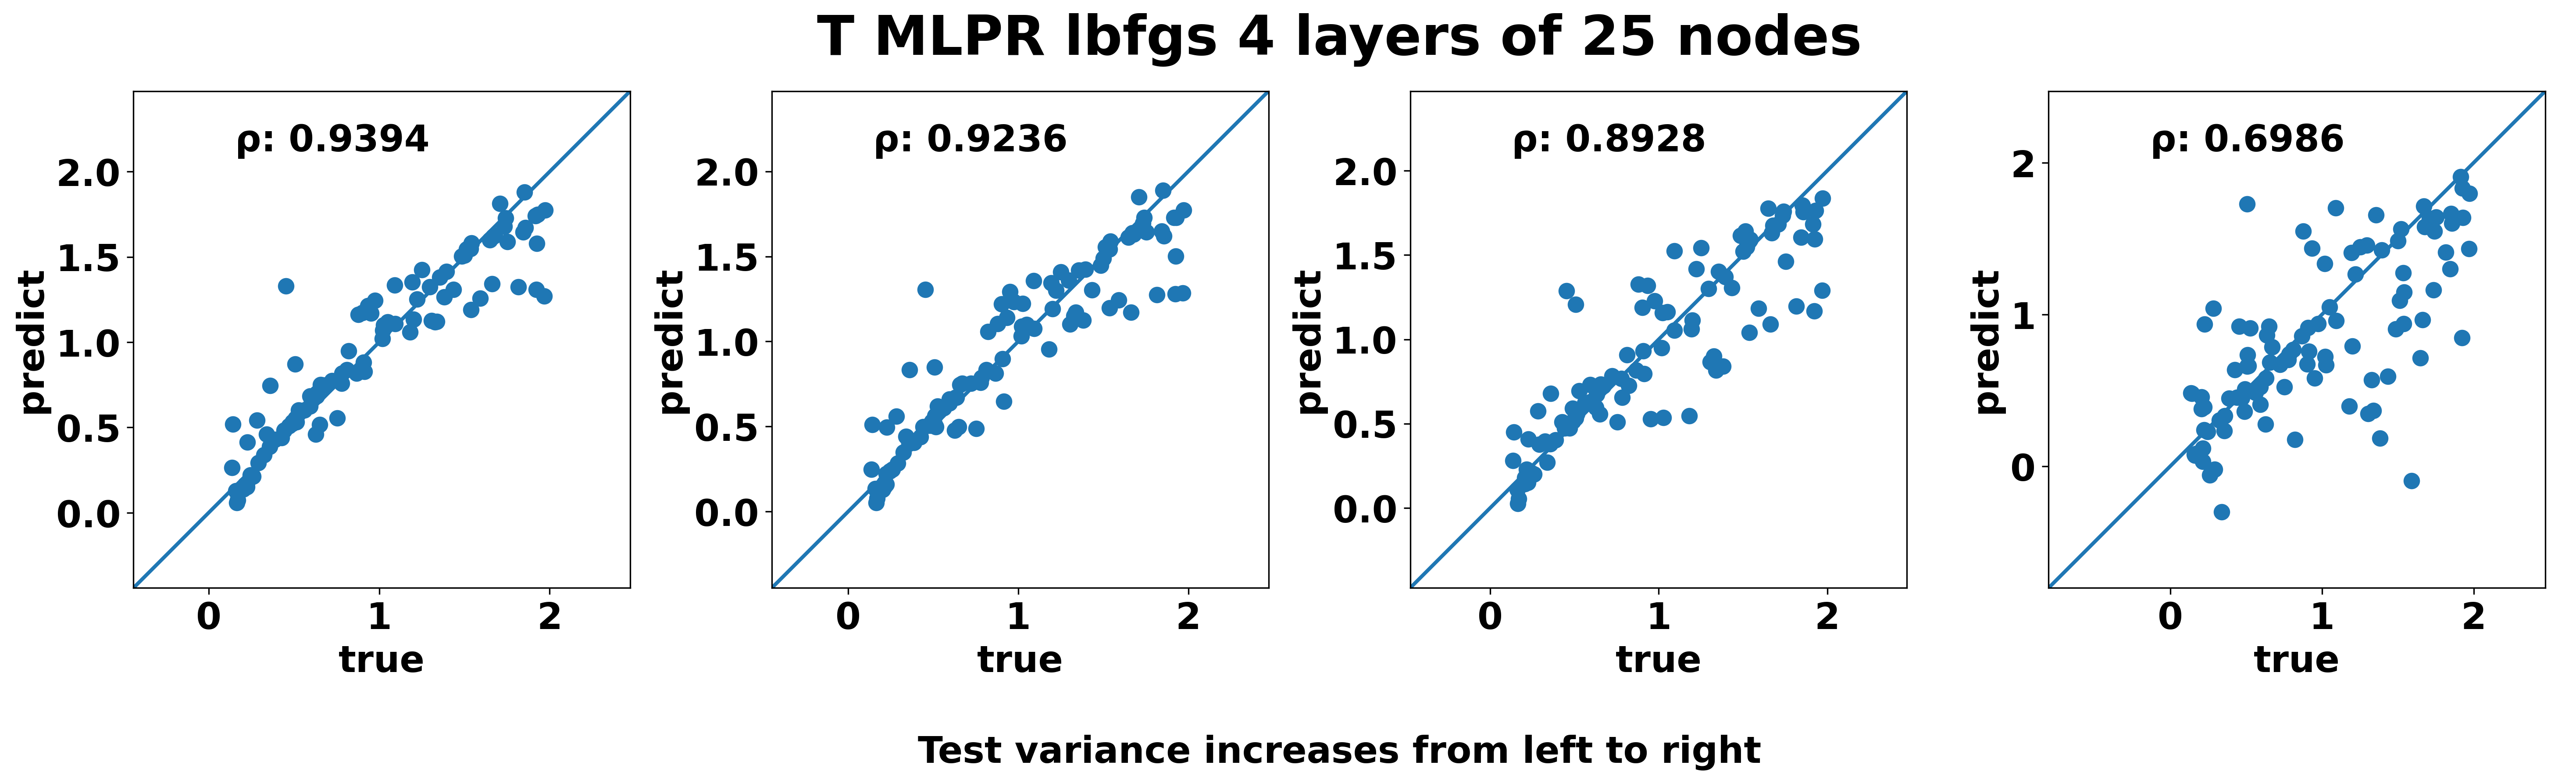

In [3]:
# Plot 1x4 MLPR lbfgs
params = ['ν', 'T']
title = 'MLPR lbfgs 4 layers of 25 nodes'
y_label = 'Test variance increases from left to right'
logs = [True, False]
size = ((30, 20), (20, 80), (8, 2, 20), (24, 5))
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi([model], list_test_dict, logs,
                    params, size, title, y_label)
# # save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'results/MLPR/{params[i]}_lbfgs_1x4.png')

In [4]:
# # Run bootstrap prediction
# # load bootstrap data
# list_bootstrap_dicts = pickle.load(open('data/bootstrap_data', 'rb'))
# # load trained model to run bootstrap on and get bootstrap predictions
# bstr_mlpr = model_bootstrap(model, list_bootstrap_dicts)
# # save the results
# pickle.dump(bstr_mlpr, open(
#     'results/bootstrap/boostrap_pred_mlpr_new', 'wb'), 2)

In [3]:
bstr_mlpr = pickle.load(open('results/bootstrap/boostrap_pred_mlpr_new', 'rb'))

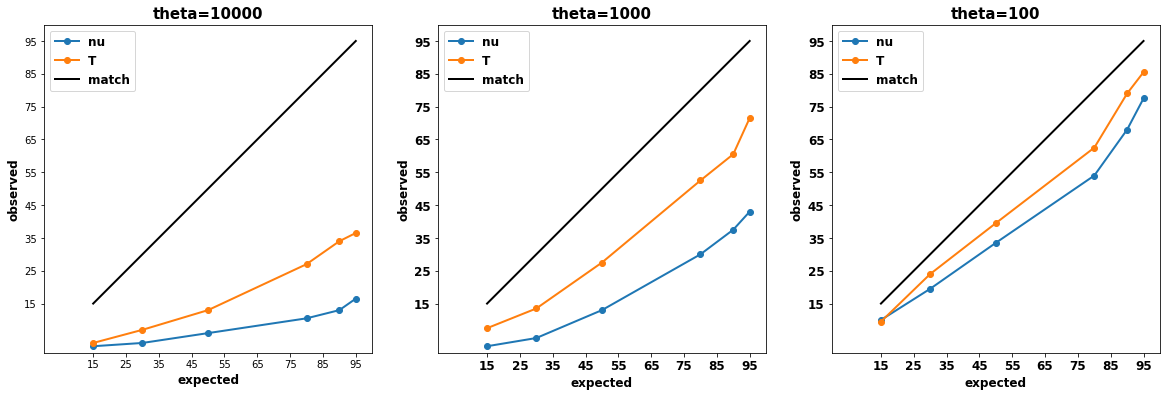

In [4]:
# Plot bootstrap prediction results: coverage
params = ['nu', 'T']
theta_list = [10000, 1000, 100]
expected = [95, 90, 80, 50, 30, 15]

plt.figure(1, figsize=(20,8))
count=1
for bootstrap_pred, theta in zip(bstr_mlpr, theta_list):
    plt.figure(1).add_subplot(1, 3, count)
    plotting.plot_coverage(bootstrap_pred, theta, params, expected)
    count+=1

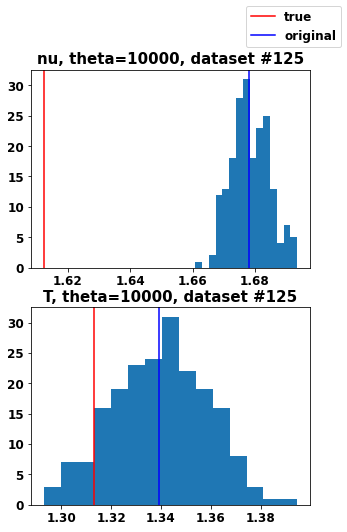

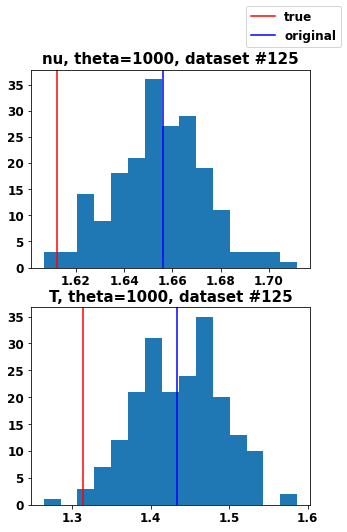

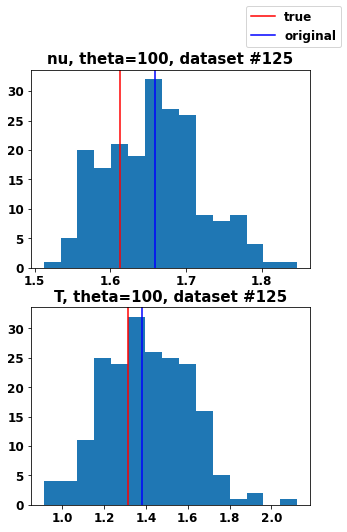

In [5]:
# Plot bootstrap prediction results: distribution for one example data set
params = ['nu', 'T']
theta_list = [10000, 1000, 100]
expected = [95, 90, 80, 50, 30, 15]

for bootstrap_pred, theta in zip(bstr_mlpr, theta_list):
    plotting.plot_distribution(bootstrap_pred, theta, params, 125)


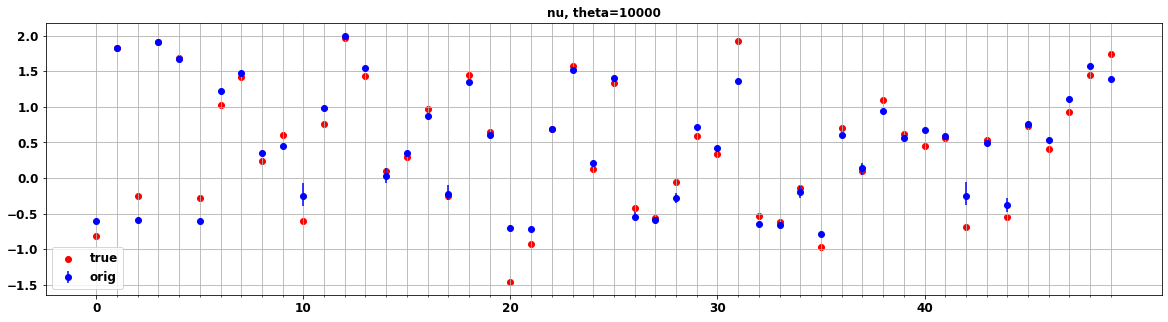

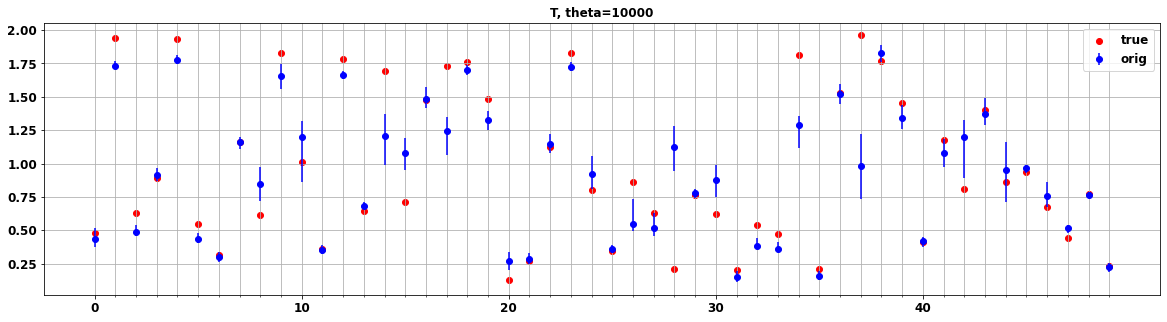

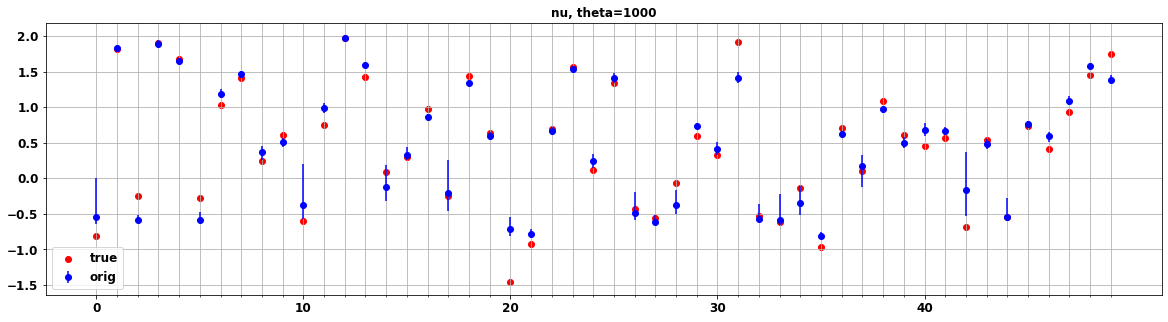

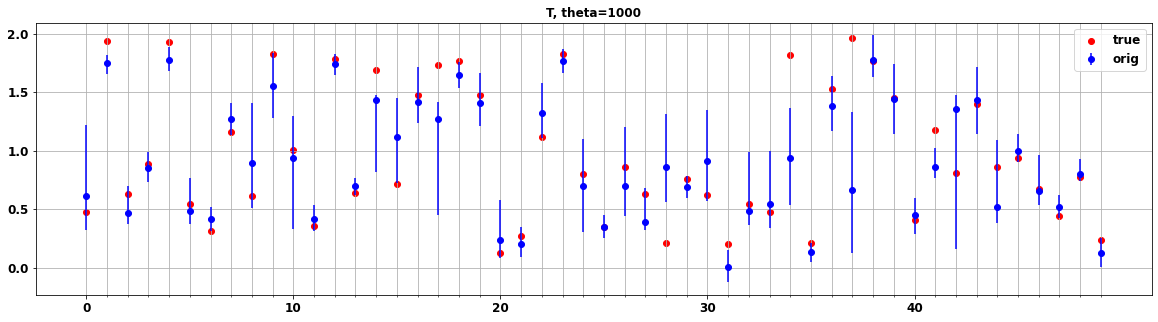

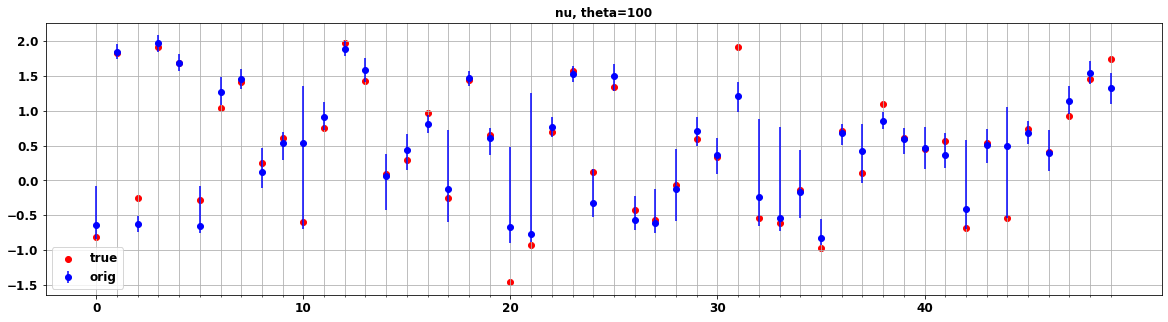

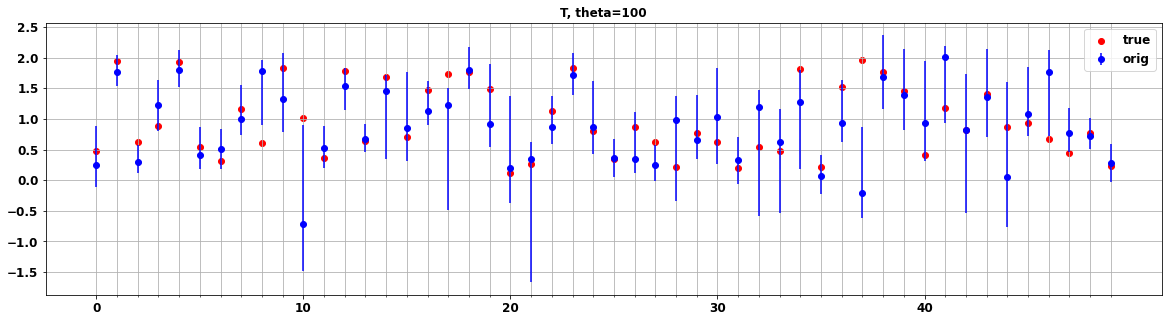

In [6]:
# Plot bootstrap prediction results: intervals for 50 example data sets
params = ['nu', 'T']
theta_list = [10000, 1000, 100]
for bootstrap_pred, theta in zip(bstr_mlpr, theta_list):
    plotting.plot_intervals(bootstrap_pred, theta, params, size=50)